In [1]:
import pandas as pd
import numpy as np
import scipy.constants
from scipy.constants import golden as phi

In [2]:
# Read the data
import datetime


df = pd.read_csv('HandBookData.csv', names=['Date','Value'])

df.head()

,Date,Value
0,2013-01-01 00:00:00,1723
1,2013-01-01 01:00:00,1674
2,2013-01-01 02:00:00,1622
3,2013-01-01 03:00:00,1595
4,2013-01-01 04:00:00,1591


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Date     datetime64[ns]
Value            object
dtype: object

In [4]:
df.loc[df['Value'] == 'None']

,Date,Value
1634,2013-03-10 02:00:00,None
7345,2013-11-03 01:00:00,None
10370,2014-03-09 02:00:00,None
16081,2014-11-02 01:00:00,None
19106,2015-03-08 02:00:00,None
24817,2015-11-01 01:00:00,None
28010,2016-03-13 02:00:00,None
33721,2016-11-06 01:00:00,None
36746,2017-03-12 02:00:00,None
42457,2017-11-05 01:00:00,None


In [5]:
df.loc[df['Value'] == 'None','Value'] = np.NaN

In [6]:
df.loc[df['Value'] == 'NaN']

,Date,Value


In [7]:
df['Value'] = pd.to_numeric(df['Value'])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date', ylabel='Value'>

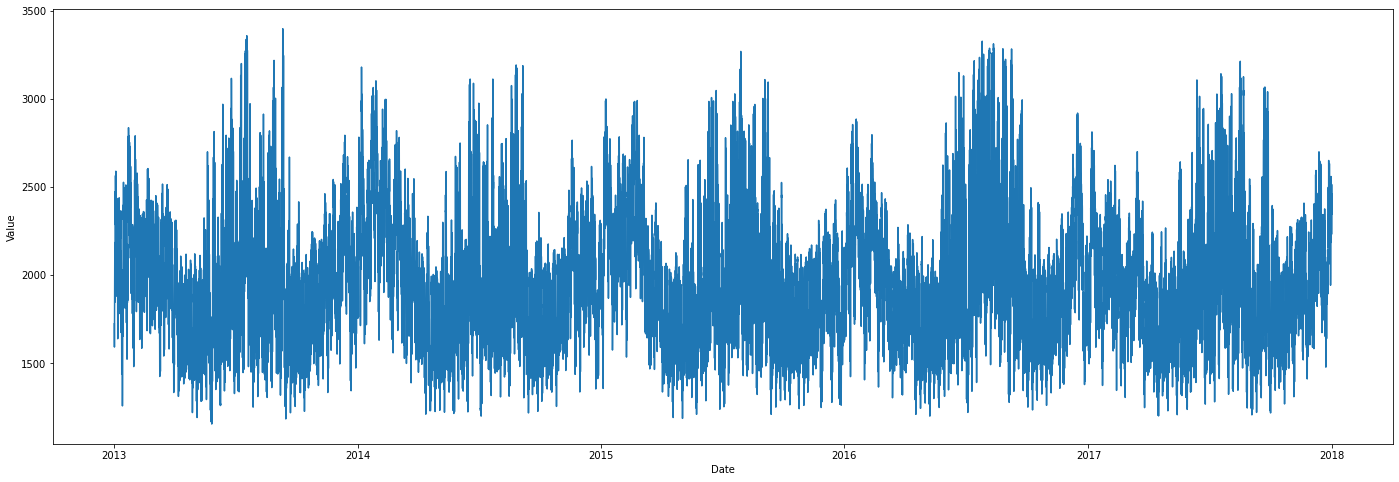

In [9]:
# Plotting all the data
fig = plt.figure(figsize=(24,8))
sns.lineplot(x='Date',y='Value',data=df)

<AxesSubplot:xlabel='Date', ylabel='Value'>

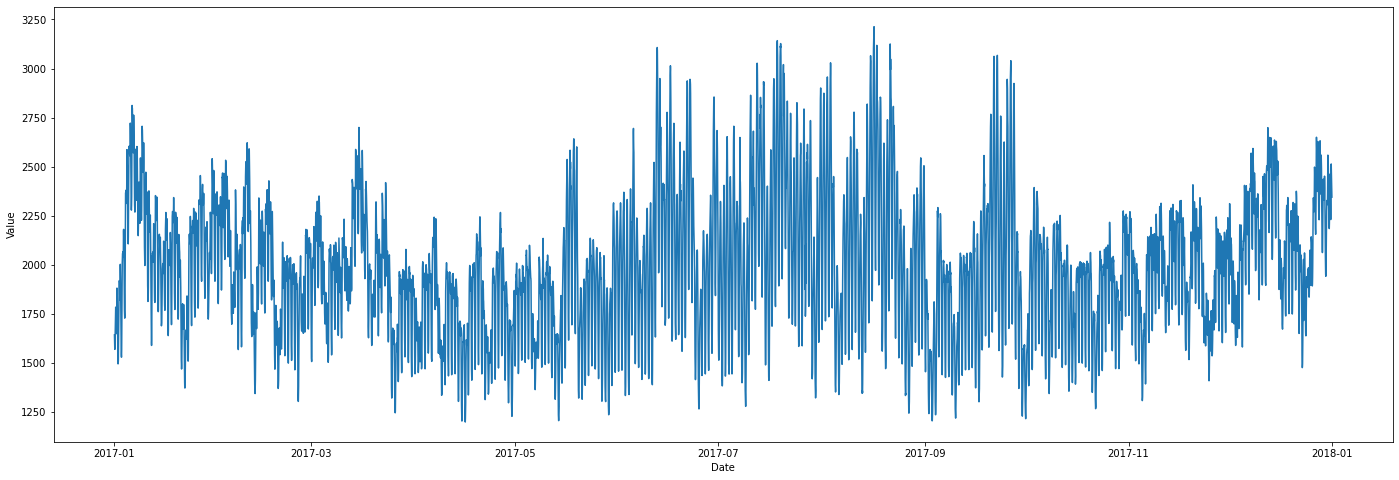

In [10]:
#Plotting for 2017 only
df_2017 = df.loc[df['Date'].dt.year == 2017]

fig = plt.figure(figsize=(24,8))
sns.lineplot(x='Date',y='Value',data=df_2017)

In [11]:
# Overlapping plots for all years

weekday_map = { 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' }
month_map = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December' }

df['Year'] = (df['Date'].dt.year).astype(np.int32)
df['Month'] = df['Date'].dt.month
df['Monthname'] = df['Date'].dt.month.map(month_map)
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Weekday'] = df['Date'].dt.dayofweek.map(weekday_map)
df['Hour'] = df['Date'].dt.hour

df.sample(5)

,Date,Value,Year,Month,Monthname,Week,Day,DayOfWeek,Weekday,Hour
15325,2014-10-01 13:00:00,1981.0,2014,10,October,40,1,2,Wednesday,13
25659,2015-12-06 03:00:00,1684.0,2015,12,December,49,6,6,Sunday,3
26956,2016-01-29 04:00:00,1871.0,2016,1,January,4,29,4,Friday,4
26452,2016-01-08 04:00:00,1821.0,2016,1,January,1,8,4,Friday,4
15950,2014-10-27 14:00:00,2059.0,2014,10,October,44,27,0,Monday,14


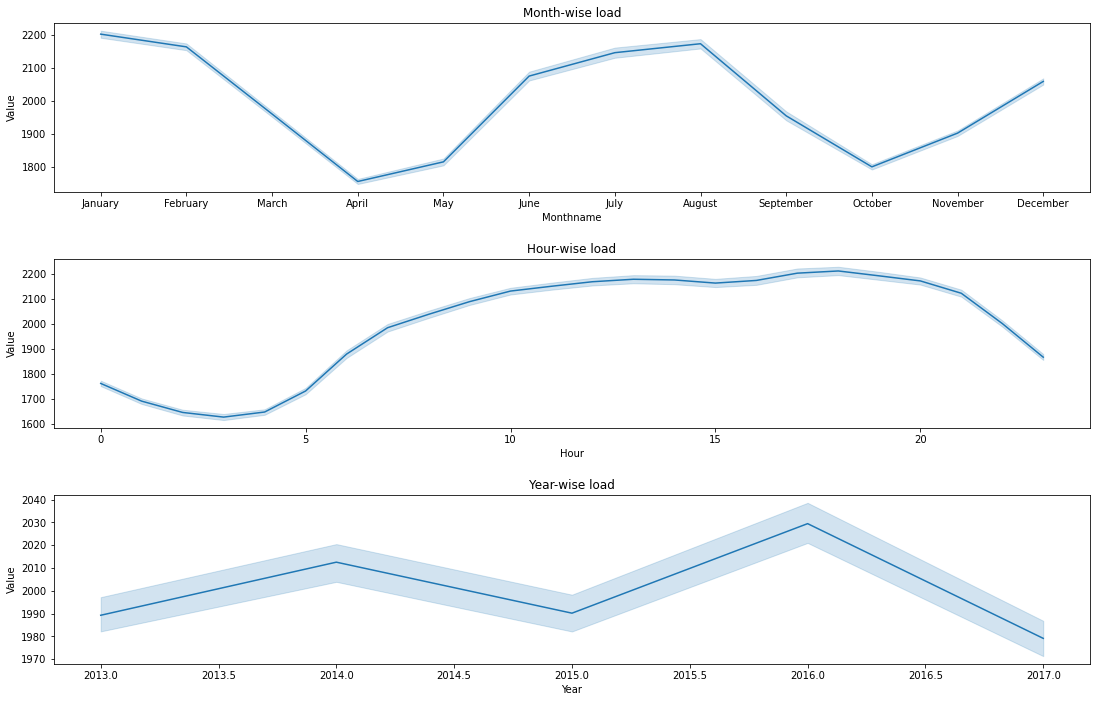

In [12]:
width = 18
fig, ax = plt.subplots(3, 1, figsize=(width,width/phi))

sns.lineplot(x='Monthname',y='Value',data=df, ax=ax[0]).set_title('Month-wise load')

sns.lineplot(x='Hour',y='Value',data=df, ax=ax[1]).set_title('Hour-wise load')

sns.lineplot(x='Year',y='Value',data=df, ax=ax[2]).set_title('Year-wise load')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# A wide confidence-interval in the year-wise load graph, while there is a narrow interval in the hourly and monthly based data

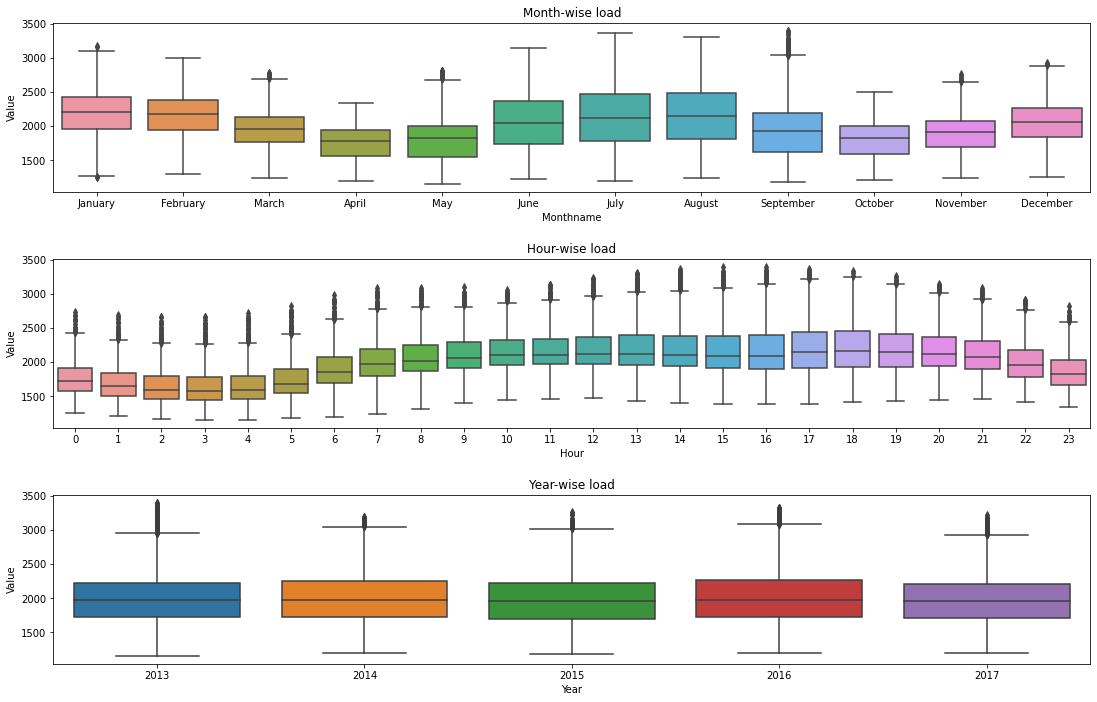

In [13]:
width = 18
fig, ax = plt.subplots(3, 1, figsize=(width,width/phi))

sns.boxplot(x='Monthname',y='Value',data=df, ax=ax[0]).set_title('Month-wise load')

sns.boxplot(x='Hour',y='Value',data=df, ax=ax[1]).set_title('Hour-wise load')

sns.boxplot(x='Year',y='Value',data=df, ax=ax[2]).set_title('Year-wise load')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

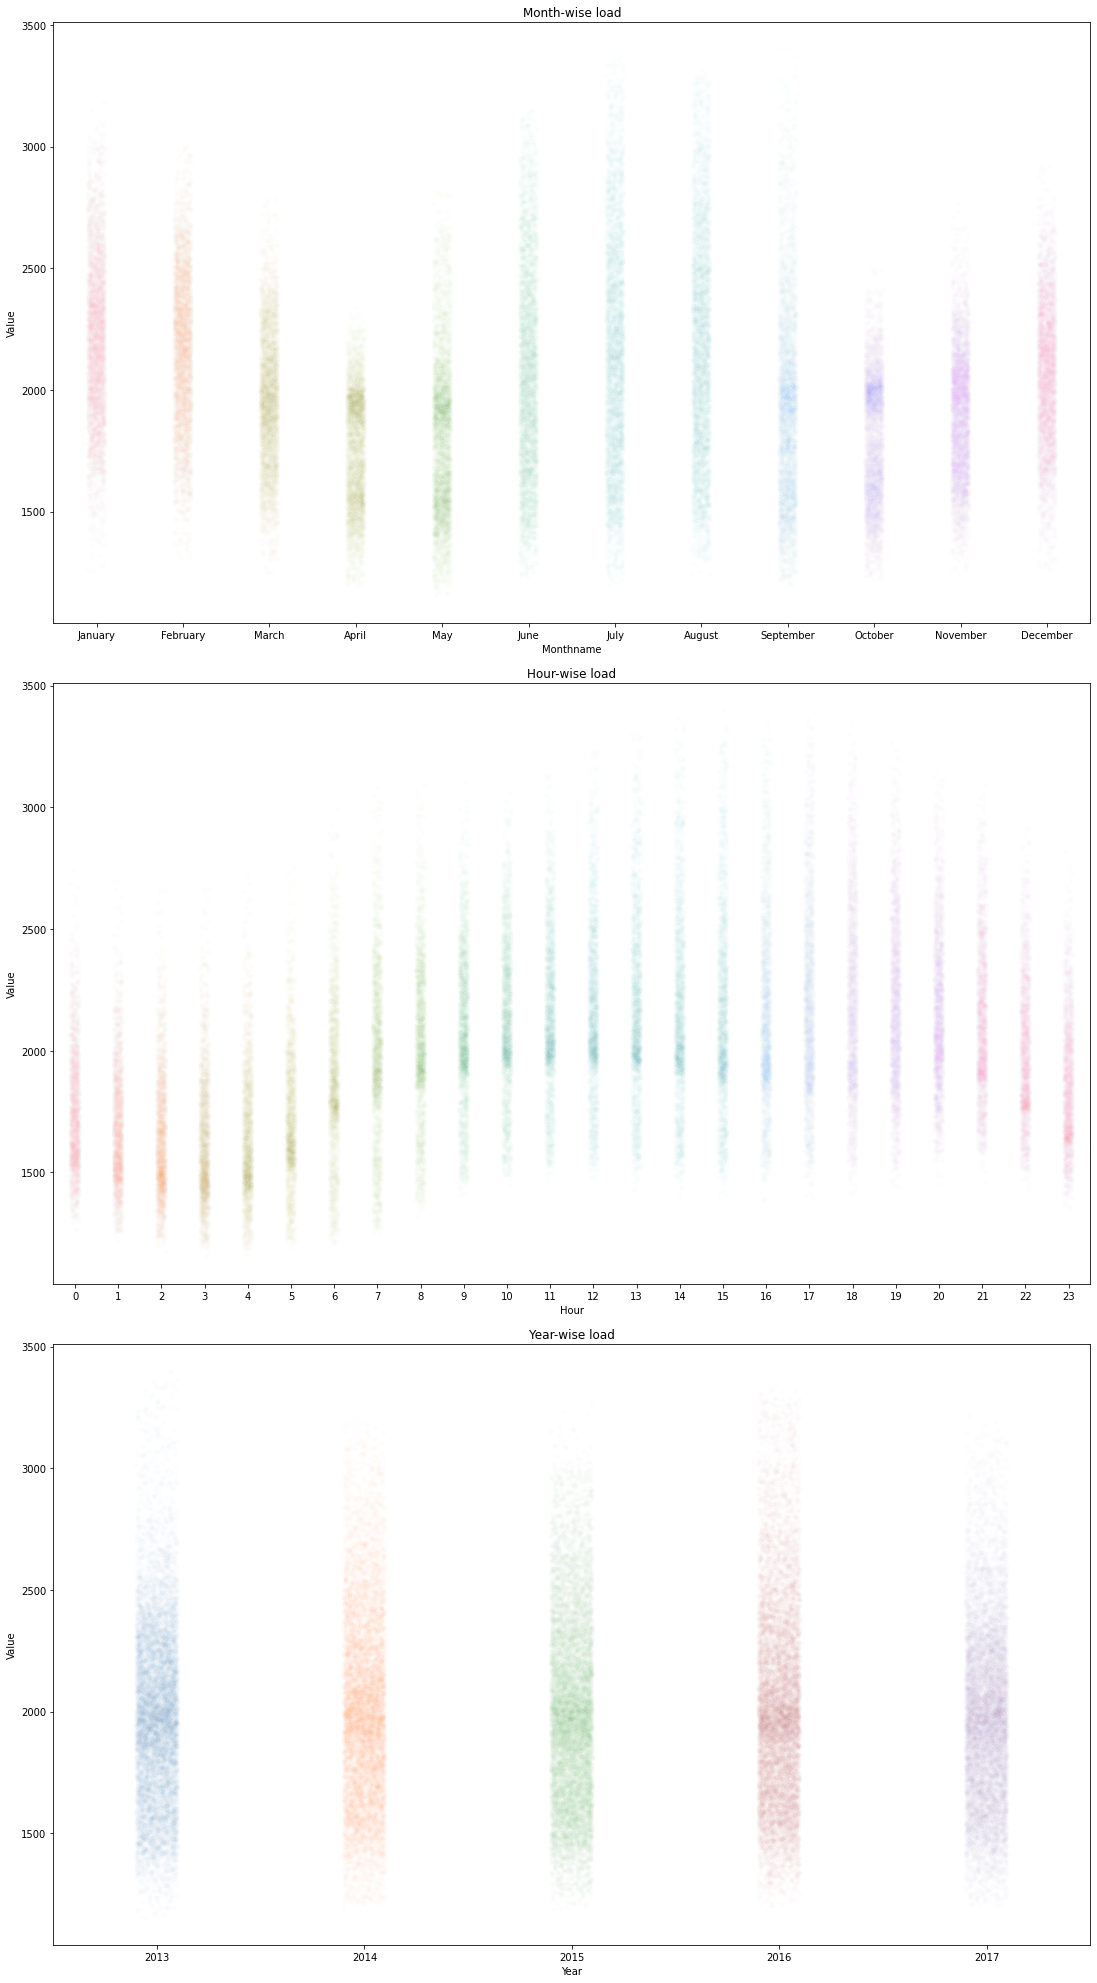

In [14]:
width = 18
fig, ax = plt.subplots(3, 1, figsize=(width,width/phi*3))

# sns.boxplot(x='Month',y='Value',data=df, ax=ax[0]).set_title('Month-wise load')
sns.stripplot(x="Monthname", y="Value", data=df, ax=ax[0], alpha=0.01).set_title('Month-wise load')

# sns.boxplot(x='Hour',y='Value',data=df, ax=ax[1]).set_title('Hour-wise load')
sns.stripplot(x='Hour',y='Value',data=df, ax=ax[1], alpha=0.01).set_title('Hour-wise load')

# sns.boxplot(x='Year',y='Value',data=df, ax=ax[2]).set_title('Year-wise load')
sns.stripplot(x='Year',y='Value',data=df, ax=ax[2], alpha=0.01).set_title('Year-wise load')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

<AxesSubplot:xlabel='Week', ylabel='Value'>

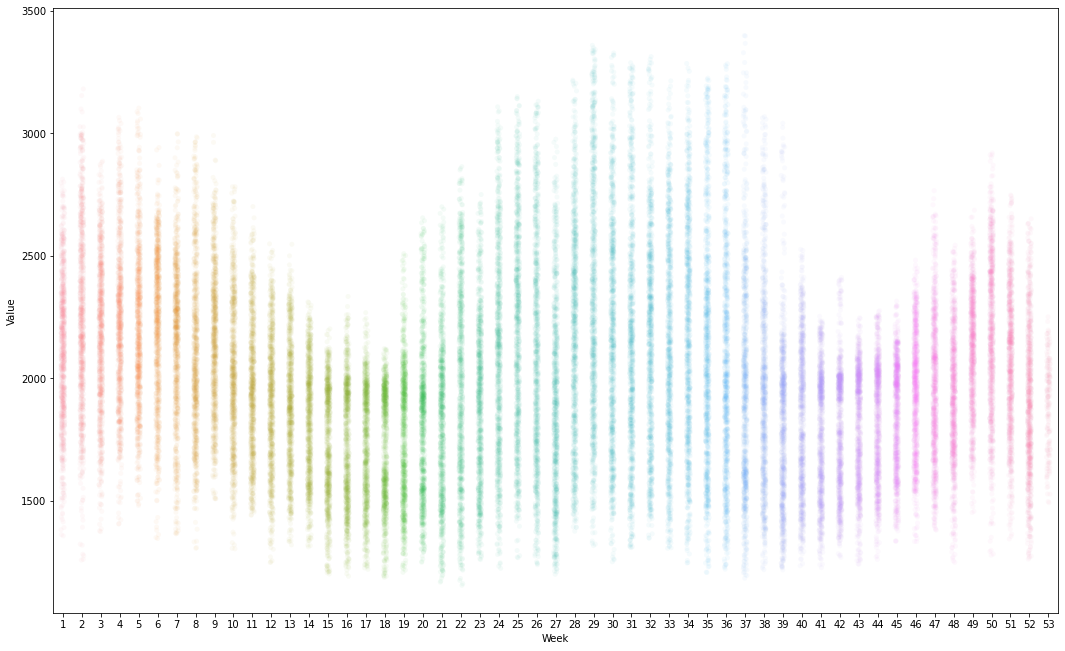

In [15]:
width = 18
fig, ax = plt.subplots(1, 1, figsize=(width,width/phi))
sns.stripplot(x='Week',y='Value',data=df, ax=ax, alpha=0.05)

<AxesSubplot:xlabel='Weekday', ylabel='Value'>

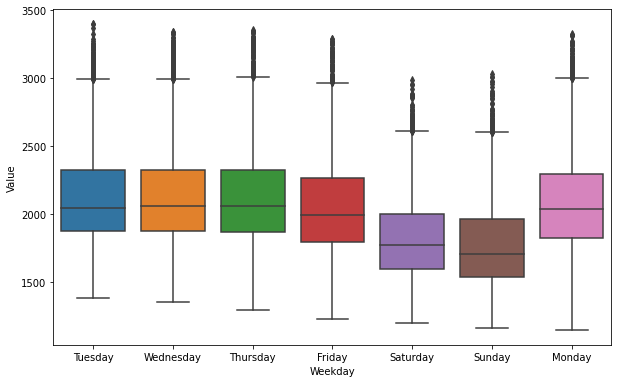

In [16]:
width = 10
fig, ax = plt.subplots(1, 1, figsize=(width,width/phi))
sns.boxplot(x='Weekday',y='Value',data=df, ax=ax)

we can see that there is some discrepancy in the monthly and weekly loads. There is a wide box plot and upon plotting the stripplot we can see that there are 2 zones of condesed points. This means that the data in the monthly data and weekly is affected by something else.

Let's just take the data of 2017 and find out what's going on. We can also switch to taking only data from wedensday.

In [17]:
df_2017 = df.loc[df['Year'] == 2017]

df_2017.sample(5)

,Date,Value,Year,Month,Monthname,Week,Day,DayOfWeek,Weekday,Hour
35645,2017-01-25 05:00:00,1916.0,2017,1,January,4,25,2,Wednesday,5
41265,2017-09-16 09:00:00,1706.0,2017,9,September,37,16,5,Saturday,9
41988,2017-10-16 12:00:00,1983.0,2017,10,October,42,16,0,Monday,12
42342,2017-10-31 06:00:00,2123.0,2017,10,October,44,31,1,Tuesday,6
40430,2017-08-12 14:00:00,2174.0,2017,8,August,32,12,5,Saturday,14


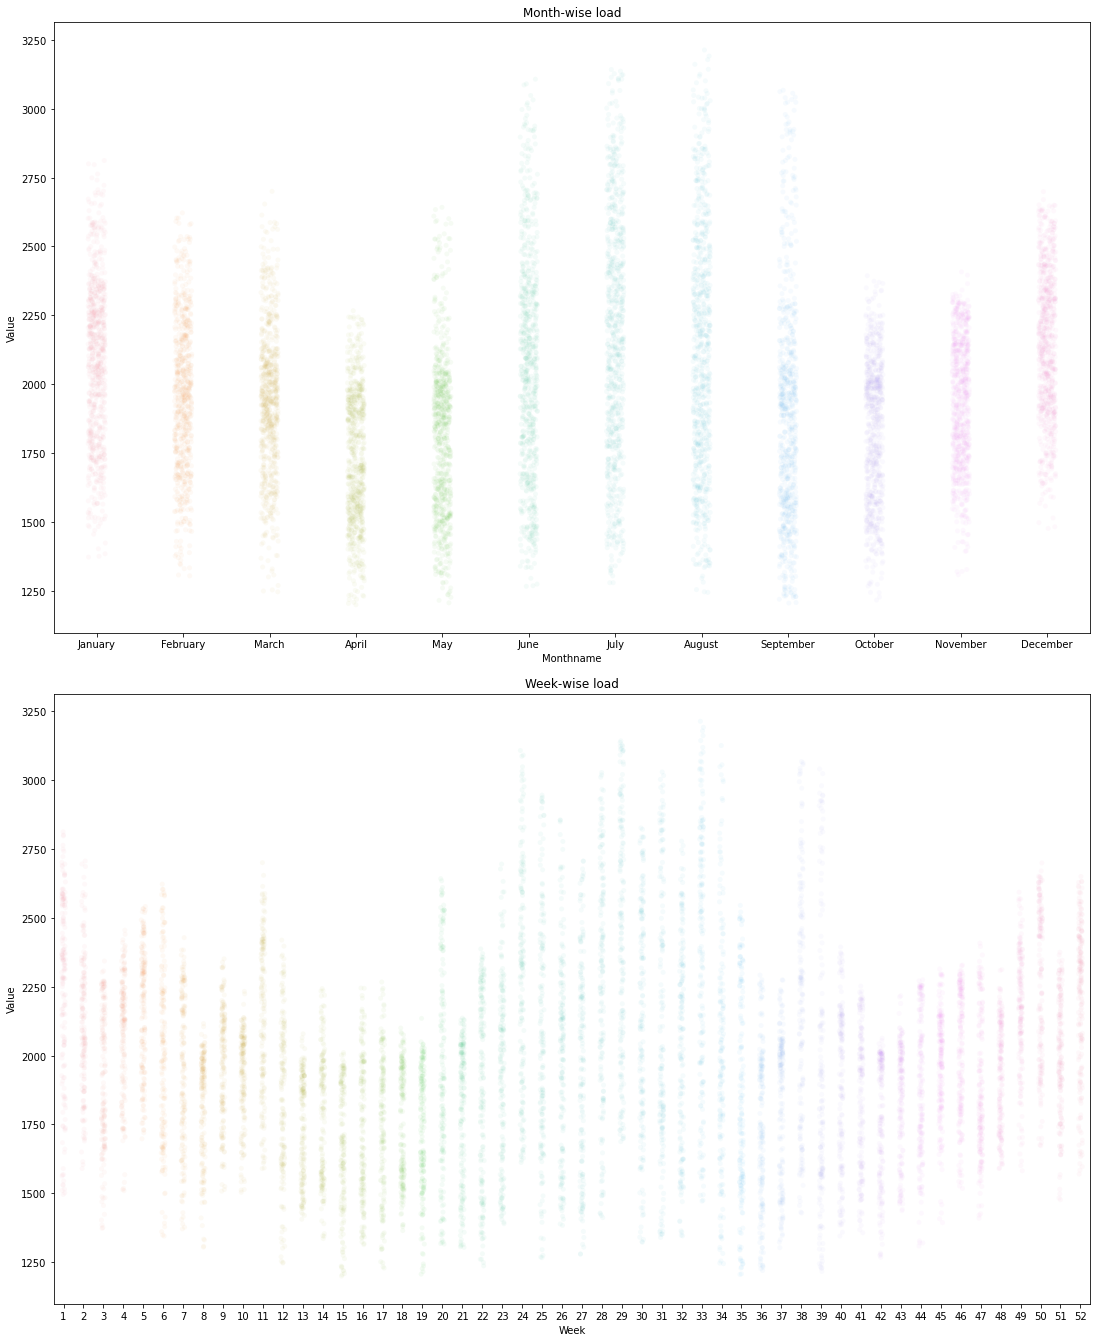

In [18]:
width = 18
fig, ax = plt.subplots(2, 1, figsize=(width,width/phi*2))

# sns.boxplot(x='Month',y='Value',data=df, ax=ax[0]).set_title('Month-wise load')
sns.stripplot(x="Monthname", y="Value", data=df_2017, ax=ax[0], alpha=0.05).set_title('Month-wise load')

# sns.boxplot(x='Hour',y='Value',data=df, ax=ax[1]).set_title('Hour-wise load')
sns.stripplot(x='Week',y='Value',data=df_2017, ax=ax[1], alpha=0.05).set_title('Week-wise load')
# sns.stripplot(x='Week',y='Value',data=df, ax=ax[1], alpha=0.01)

# # sns.boxplot(x='Year',y='Value',data=df, ax=ax[2]).set_title('Year-wise load')
# sns.stripplot(x='Year',y='Value',data=df, ax=ax[2], alpha=0.01).set_title('Year-wise load')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

Looks like we still have the same problem. But it seems much smaller than before. Let's just take data from wednesday

In [19]:
df_2017_wed = df_2017.loc[df_2017['DayOfWeek'] == 2]

df_2017_wed.sample(5)

,Date,Value,Year,Month,Monthname,Week,Day,DayOfWeek,Weekday,Hour
41190,2017-09-13 06:00:00,1787.0,2017,9,September,37,13,2,Wednesday,6
42708,2017-11-15 12:00:00,2253.0,2017,11,November,46,15,2,Wednesday,12
36502,2017-03-01 22:00:00,2059.0,2017,3,March,9,1,2,Wednesday,22
40534,2017-08-16 22:00:00,2691.0,2017,8,August,33,16,2,Wednesday,22
36312,2017-02-22 00:00:00,1603.0,2017,2,February,8,22,2,Wednesday,0


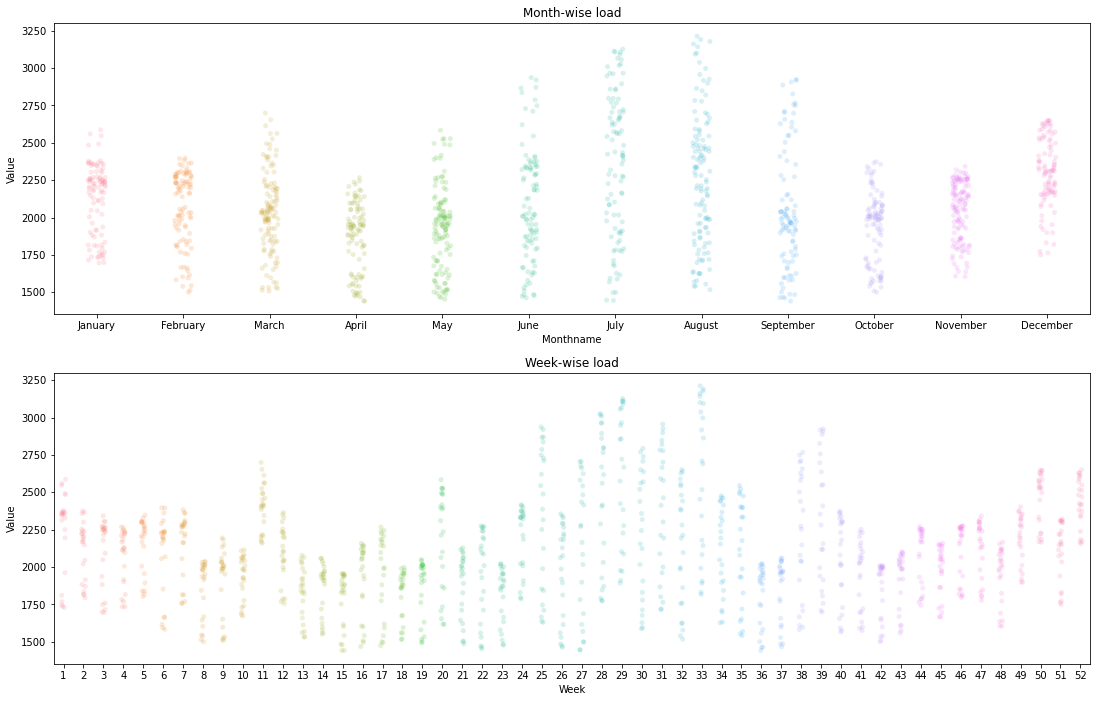

In [20]:
width = 18
fig, ax = plt.subplots(2, 1, figsize=(width,width/phi))

# sns.boxplot(x='Month',y='Value',data=df, ax=ax[0]).set_title('Month-wise load')
sns.stripplot(x="Monthname", y="Value", data=df_2017_wed, ax=ax[0], alpha=0.2).set_title('Month-wise load')

# sns.boxplot(x='Hour',y='Value',data=df, ax=ax[1]).set_title('Hour-wise load')
sns.stripplot(x='Week',y='Value',data=df_2017_wed, ax=ax[1], alpha=0.2).set_title('Week-wise load')
# sns.stripplot(x='Week',y='Value',data=df, ax=ax[1], alpha=0.01)

# # sns.boxplot(x='Year',y='Value',data=df, ax=ax[2]).set_title('Year-wise load')
# sns.stripplot(x='Year',y='Value',data=df, ax=ax[2], alpha=0.01).set_title('Year-wise load')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)